(lecture06:homework)=
# Homework 6

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.

+ The total homework points are 100. Please note that the problems are not weighed equally.

```{note}
+ This is due before the beginning of the next lecture.
+ Please match all the pages corresponding to each of the questions when you submit on gradescope.
```

## Student details

+ **First Name:** Rashi 
+ **Last Name:** Jain
+ **Email:** rashijain.x@gmail.com

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')
import requests
import os
def download(url, local_filename=None):
    """
    Downloads the file in the ``url`` and saves it in the current working directory.
    """
    data = requests.get(url)
    if local_filename is None:
        local_filename = os.path.basename(url)
    with open(local_filename, 'wb') as fd:
        fd.write(data.content)

## Problem 1 - Loops and conditionals

Consider the following list:

In [39]:
data = [1, 4, 3, 10, 4, 3, 4, 4]

+ Write a loop that computes the average of the elements in the list and ``print`` the result using two significant digits.

In [40]:
N = len(data)
sum = 0.0 

for x in data:
  sum += x

average = sum/N 
print('The average of the dataset is: {0:1.2}'.format(average))

# For significant figures use 

The average of the dataset is: 4.1


+ Write code that finds the number of times the element 4 occurs in the list. Hint: Use a loop and an if-statement.

In [41]:
count_4 = 0 

for x in data:
  if x == 4:
    # At each occurence of 4, add 1 to variable count_4. 
    count_4 += 1

print('Four occurs', count_4, 'times in the dataset')

Four occurs 4 times in the dataset


+ Write a Python function that takes a list as an argument and returns the number of times a given element (also passed as an argument to the function) appears in the list. Call that function ``find_number_of_occurences(a, elm)``. Make sure you follow best practices when writing the docstring of your function.

In [36]:
def find_number_of_occurences(a, elm):

  """ 
    The following function takes a list: a, and some element in that list, elm 
    as inputs. It then returns the number of times that element appears in that 
    list. 

    a - list 
    elm - element in the list. 

    return: count_elm (number of times element, elm appears in the list)
  """ 
  count_elm = 0  # Initiated count for element. 

  for x in a: 
    if x == elm:
      count_elm += 1  # Adding one to each time the element occurs in the list. 
      
  return count_elm


In [42]:
# Try your code here:
help(find_number_of_occurences)

Help on function find_number_of_occurences in module __main__:

find_number_of_occurences(a, elm)
    The following function takes a list: a, and some element in that list, elm 
    as inputs. It then returns the number of times that element appears in that 
    list. 
    
    a - list 
    elm - element in the list. 
    
    return: count_elm (number of times element, elm appears in the list)



In [43]:
# Try your code here:
find_number_of_occurences(data, 4)

4

+ Write a Python function that takes a list as an argument and returns the number of elements that are greater than a given element (also passed as an argument to the function). Call that function ``find_number_of_elms_greater_than(a, elm)``. Make sure you follow best practices when writing the docstring of your function.

In [44]:
def find_number_of_elms_greater_than(a, elm): 
  """ 
    The following function takes a list: a, and some number, elm as inputs. 
    It then returns the number of elements in the list that are greater than 
    the sepcified number. 

    a - list 
    elm - some given input number

    return: count_greater_than (number of elements that are greater than elm)
  """ 
  count_greater_than = 0 # Initialized count 
  
  for x in a: 
    if x > elm: # Checking if the value is greater than the specified element. 
      count_greater_than += 1

  return count_greater_than

In [46]:
# Try your code here:
help(find_number_of_elms_greater_than)

Help on function find_number_of_elms_greater_than in module __main__:

find_number_of_elms_greater_than(a, elm)
    The following function takes a list: a, and some number, elm as inputs. 
    It then returns the number of elements in the list that are greater than 
    the sepcified number. 
    
    a - list 
    elm - some given input number
    
    return: count_greater_than (number of elements that are greater than elm)



In [47]:
# Try your code here:
find_number_of_elms_greater_than(data, 3)

5

## Problem 2 - High-performance buildings revisited

In this problem we will continue analyzing the high-performance buildings dataset we introduced in {ref}`lecture03:homework:problem1` and with which we played in {ref}`lecture06:selecting-rows`.
Let me set you up by downloading and cleaning the data file:

In [102]:
url = 'https://raw.githubusercontent.com/PurdueMechanicalEngineering/me-297-intro-to-data-science/master/data/temperature_raw.xlsx'
download(url)
import pandas as pd
df = pd.read_excel('temperature_raw.xlsx')
df = df.dropna(axis=0)
df.date = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.head()

,household,date,score,t_out,t_unit,hvac
0,a1,2018-01-07,100.0,4.283373,66.693229,246.473231
1,a10,2018-01-07,100.0,4.283373,66.356134,5.492116
2,a11,2018-01-07,58.0,4.283373,71.549132,402.094327
3,a12,2018-01-07,64.0,4.283373,73.429514,211.692244
4,a13,2018-01-07,100.0,4.283373,63.923937,0.850536


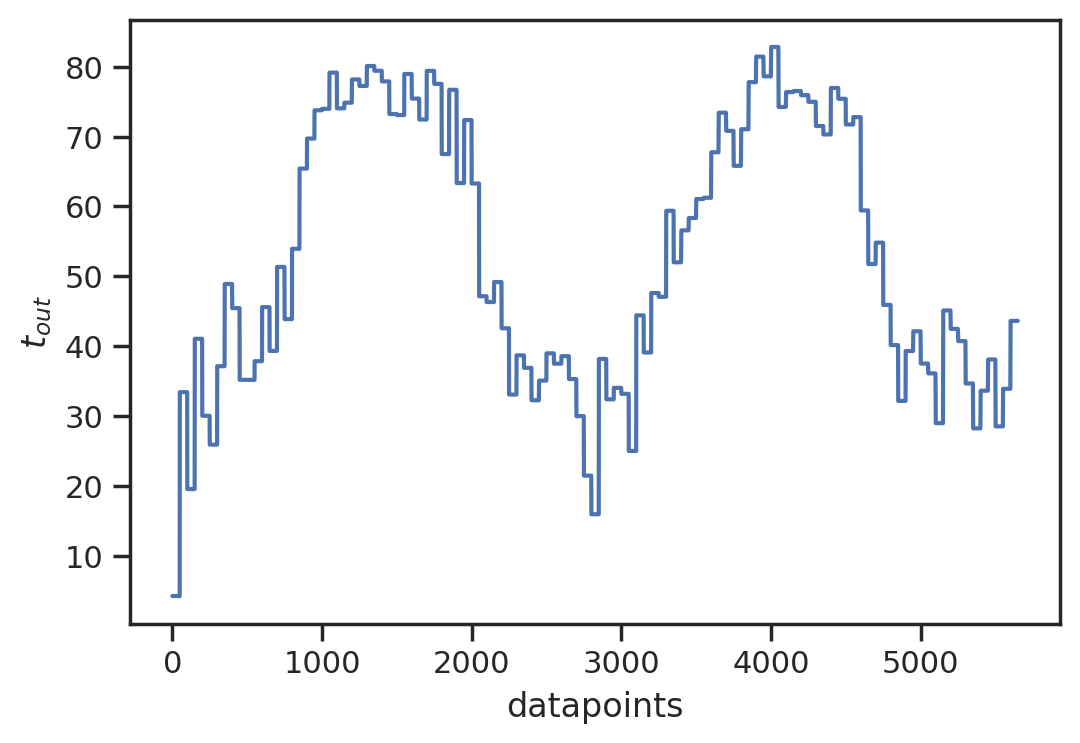

In [101]:
# + Plot the external temperature `t_out` 
fig, ax = plt.subplots()
ax.plot(df['t_out'])
ax.set_xlabel('datapoints')
ax.set_ylabel('$t_{out}$');

+ Extract the data pertaining to household `a5`.
Put the result in a new dataframe called `df_a5`.

In [126]:
 df_a5 = df[(df.household == 'a5')]
 df_a5.head()


,household,date,score,t_out,t_unit,hvac
11,a5,2018-01-07,64.0,4.283373,74.854456,286.011150
61,a5,2018-01-14,78.0,33.444172,74.786855,137.786711
111,a5,2018-01-21,67.0,19.584102,75.463740,229.760337
161,a5,2018-01-28,74.0,41.076513,75.382341,79.433718
211,a5,2018-02-04,64.0,30.065774,75.676811,118.032515


+ For household `a5`, plot `t_unit` as a function of date.

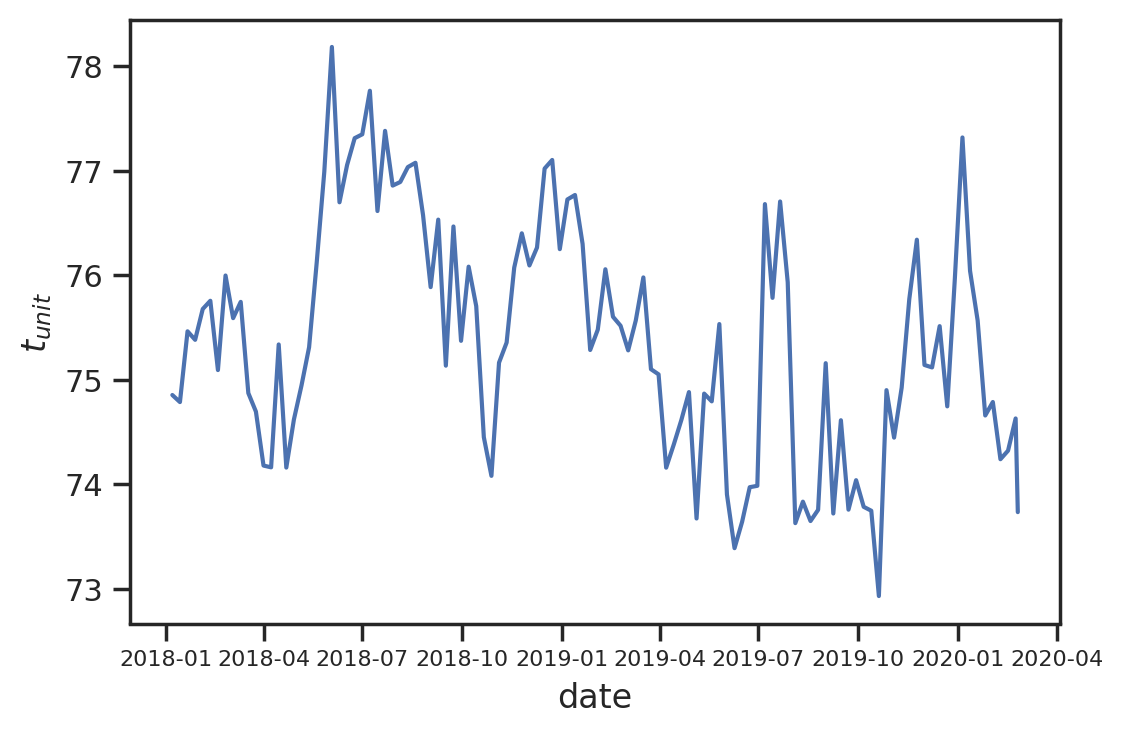

In [136]:
fig, ax = plt.subplots()

ax.plot(df_a5['date'], df_a5['t_unit'])

ax.tick_params(axis='x', labelsize=8)
ax.set_xlabel('date')

ax.set_ylabel('$t_{unit}$');




+ Do the same figure, plot `date` vs `t_unit` for households `a5` and `a11`.

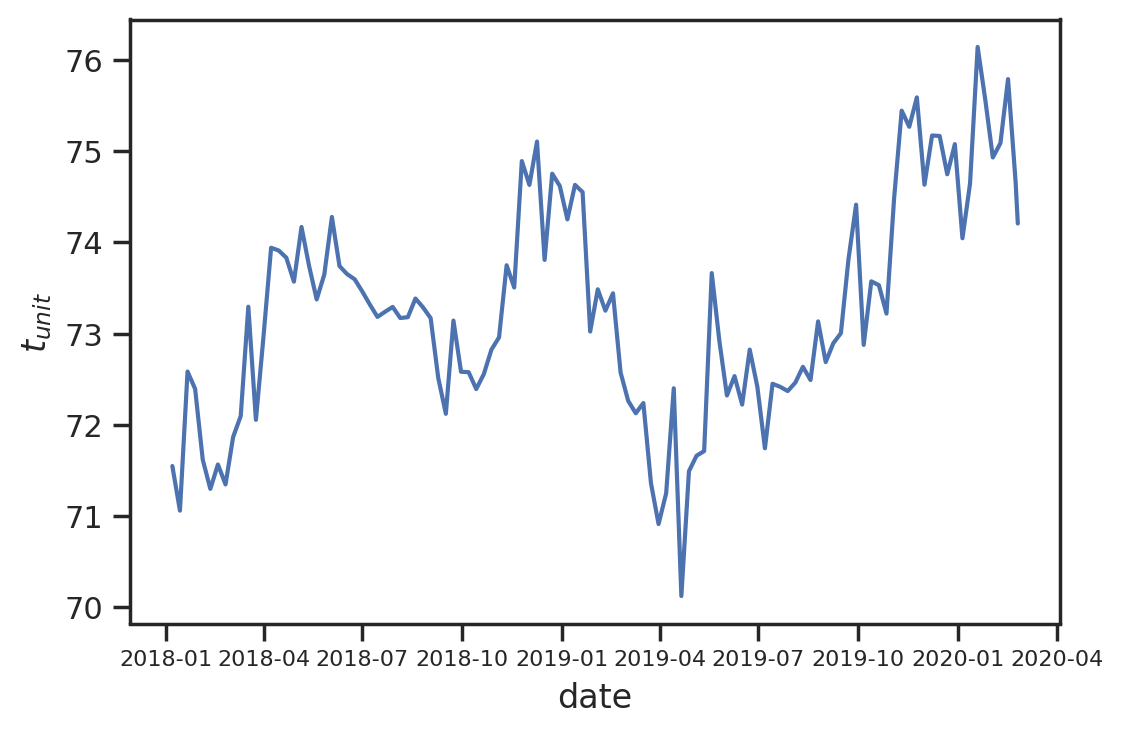

In [137]:
# It's been done above for a5. 
df_a11 = df[(df.household == 'a11')]
 
fig, ax = plt.subplots()

ax.plot(df_a11['date'], df_a11['t_unit'])

ax.tick_params(axis='x', labelsize=8)
ax.set_xlabel('date')

ax.set_ylabel('$t_{unit}$');




+ In the same figure, plot the `t_out` and `t_unit` scatter plots for both households `a5` and `a11`.

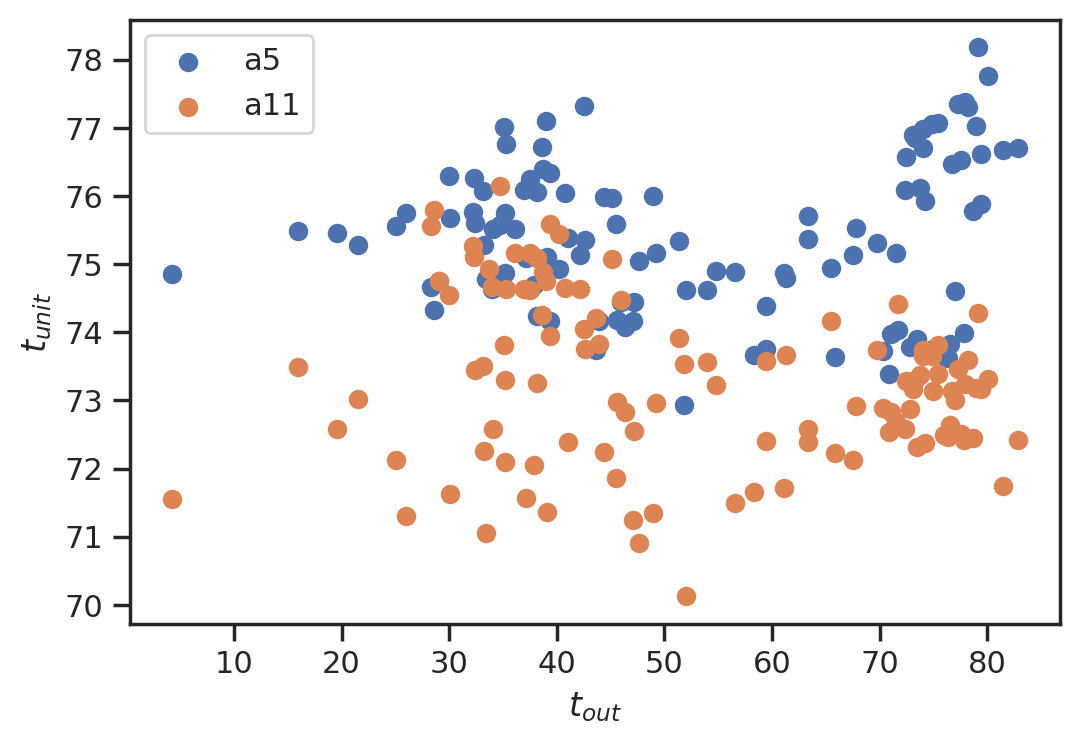

In [143]:
fig, ax = plt.subplots()
ax.scatter(df_a5['t_out'], df_a5['t_unit'], label = 'a5')
ax.scatter(df_a11['t_out'], df_a11['t_unit'], label = 'a11')
ax.set_xlabel('$t_{out}$')
ax.set_ylabel('$t_{unit}$')
ax.legend(loc = 'best'); 

+ In the same figure, plot the `t_out` and `hvac` scatter plots for both households `a5` and `a11`.

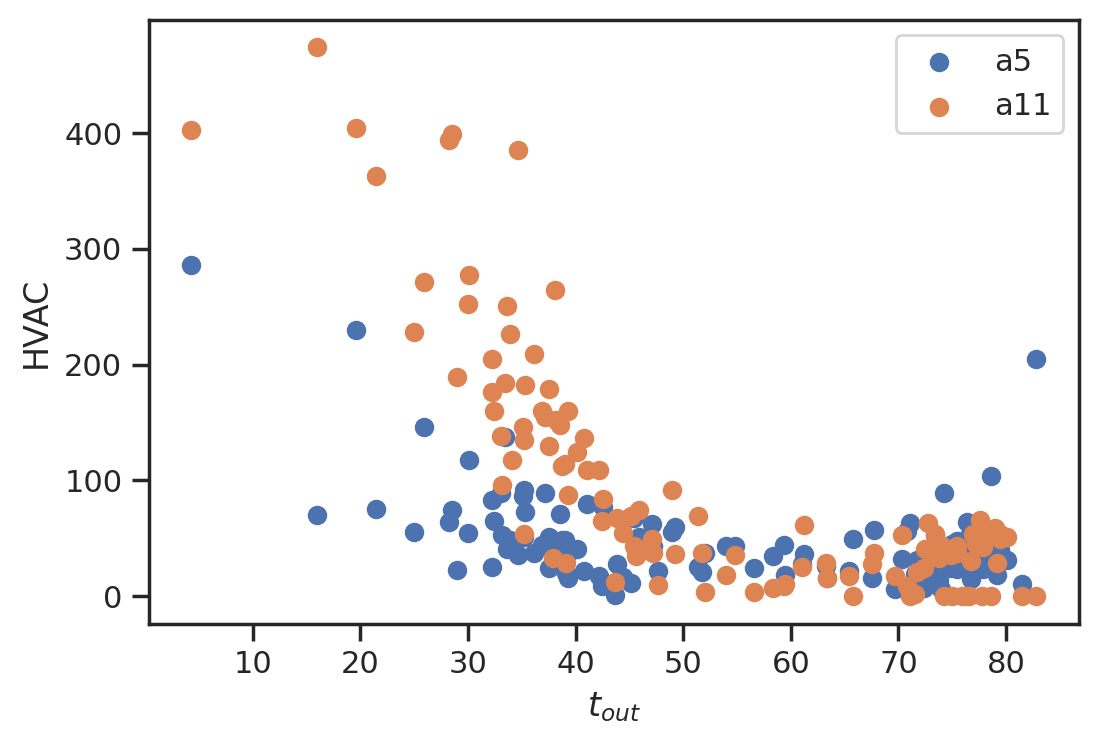

In [144]:
fig, ax = plt.subplots()
ax.scatter(df_a5['t_out'], df_a5['hvac'], label = 'a5')
ax.scatter(df_a11['t_out'], df_a11['hvac'], label = 'a11')
ax.set_xlabel('$t_{out}$')
ax.set_ylabel('HVAC')
ax.legend(loc = 'best'); 

+ In the same figure, plot the histogram of `t_unit` for households `a5` and `a11`.
Which household prefers cooler temperatures?
Hint: To make the histogram more appealing use the keywords ``density=True, alpha=0.25``.

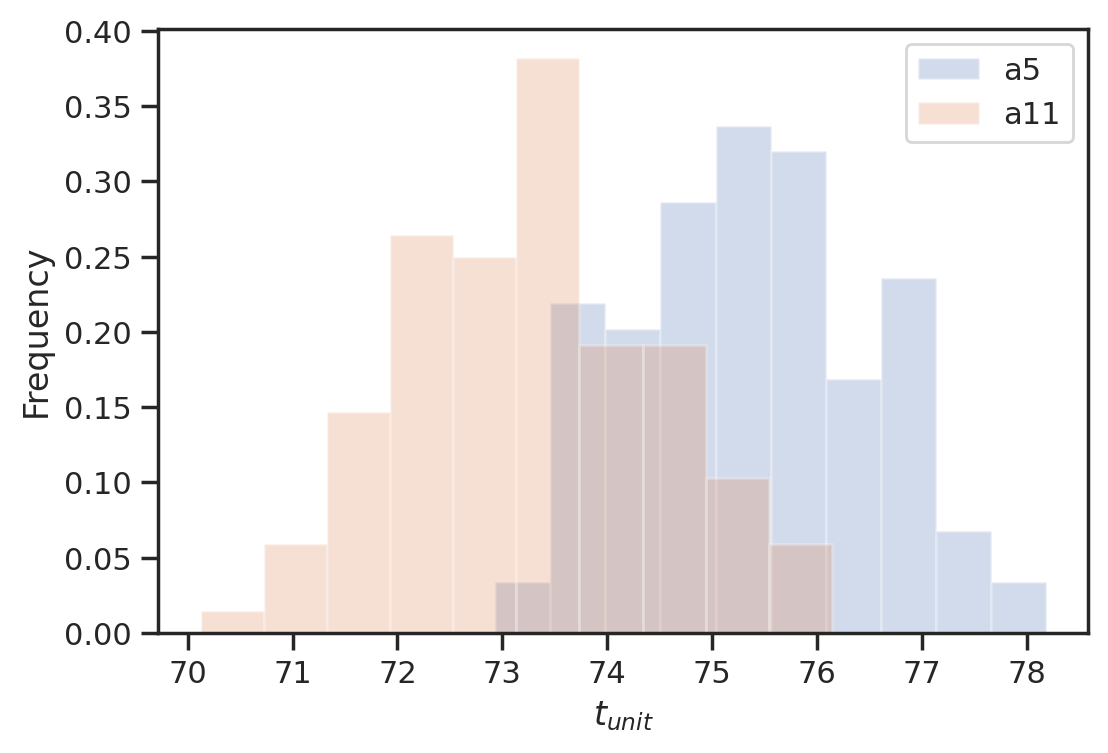

In [146]:
fig, ax = plt.subplots()
ax.hist(df_a5['t_unit'], density=True, alpha = 0.25, label = 'a5')
ax.hist(df_a11['t_unit'], density=True, alpha = 0.25, label = 'a11')
ax.set_xlabel('$t_{unit}$'); 
ax.set_ylabel('Frequency');
ax.legend(loc = 'best'); 

According to this histogram unit a11 prefers cooler temperature. The mean, mode, and median for a11, are lower than a5. 

+ In the same figure, plot the histogram of `hvac` for households `a5` and `a11`.
Which household is more energy efficient (if any) and why?

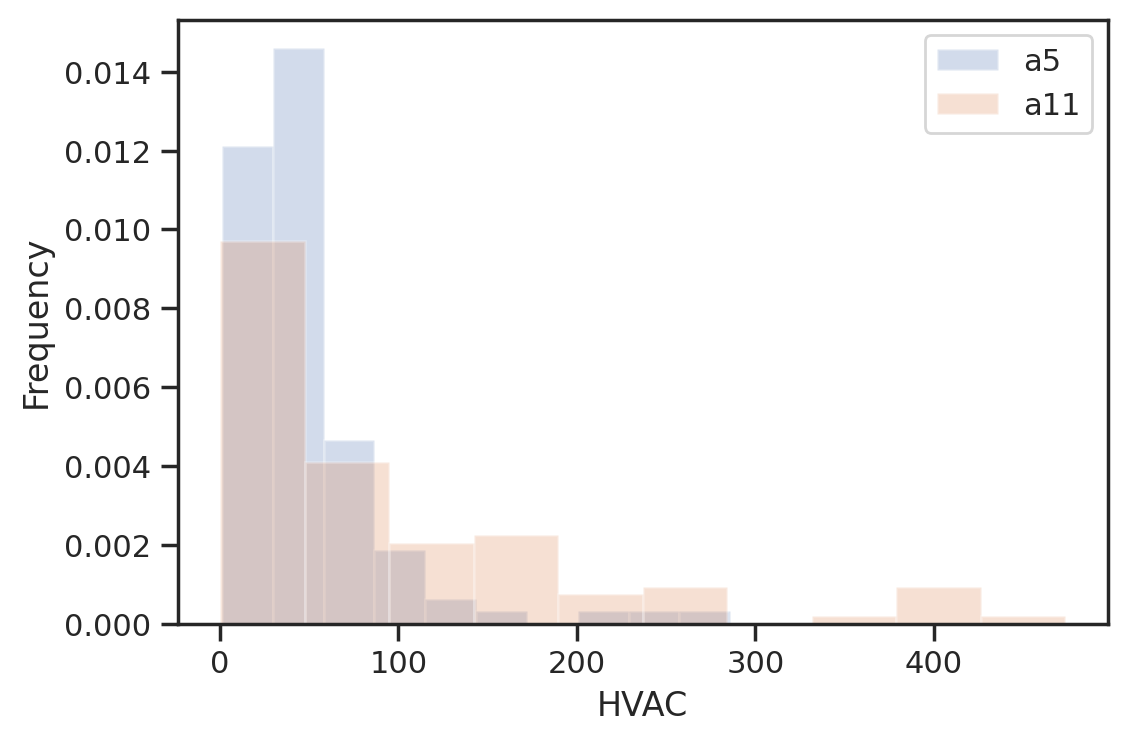

In [148]:
fig, ax = plt.subplots()
ax.hist(df_a5['hvac'], density=True, alpha = 0.25, label = 'a5')
ax.hist(df_a11['hvac'], density=True, alpha = 0.25, label = 'a11')
ax.set_xlabel('HVAC')
ax.set_ylabel('Frequency')
ax.legend(loc = 'best'); 

According to the histogram, unit a5 uses more HVAC in at lower power levels compared to unit a11. However unit a11 makes slight use of HVAC at higher levels. 

+ Repeat the analysis above for households `b17` and `c40`. Which household prefers cooler temperatures and which one is more energy efficient?

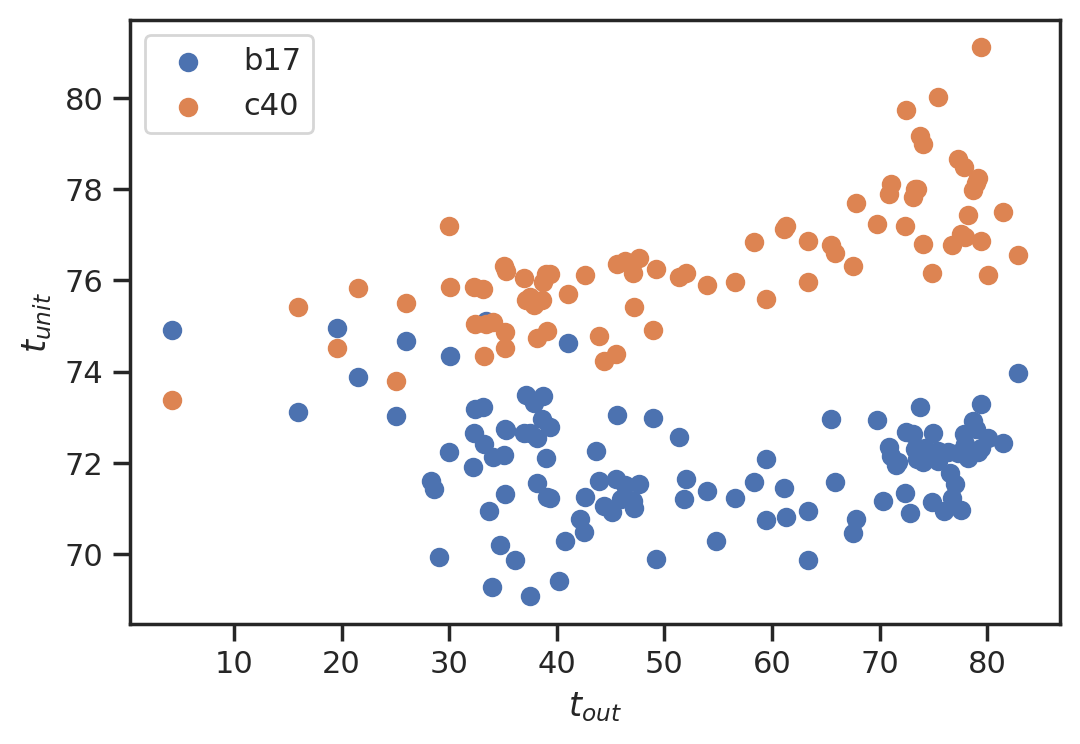

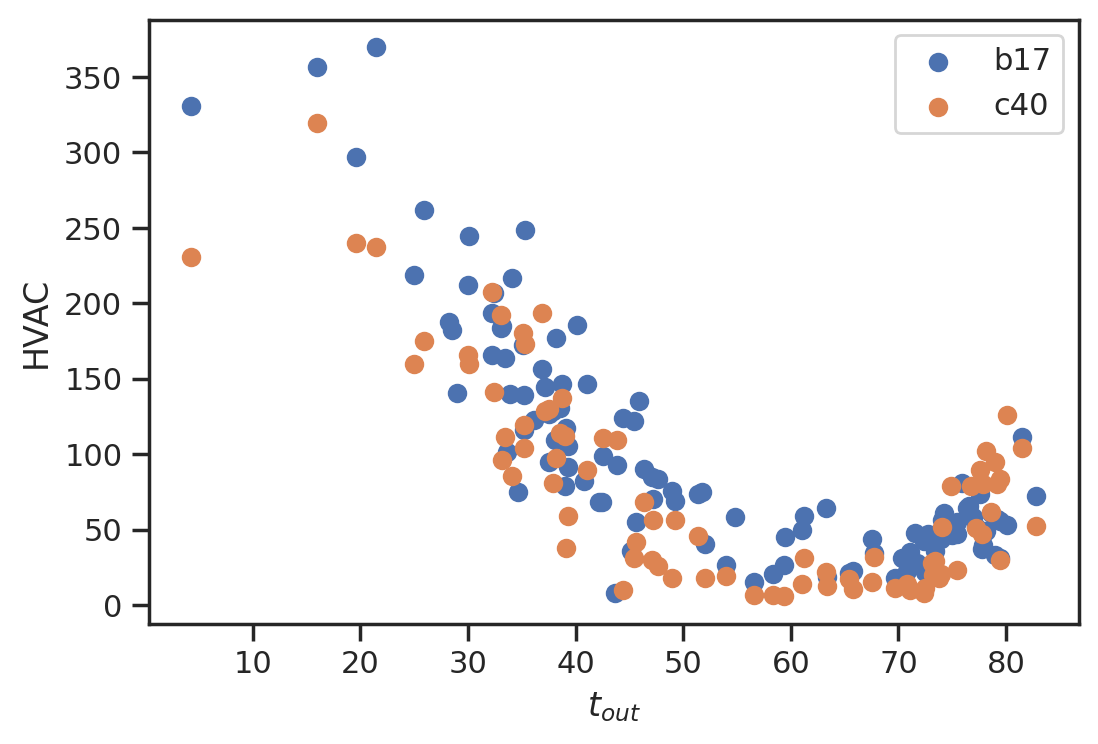

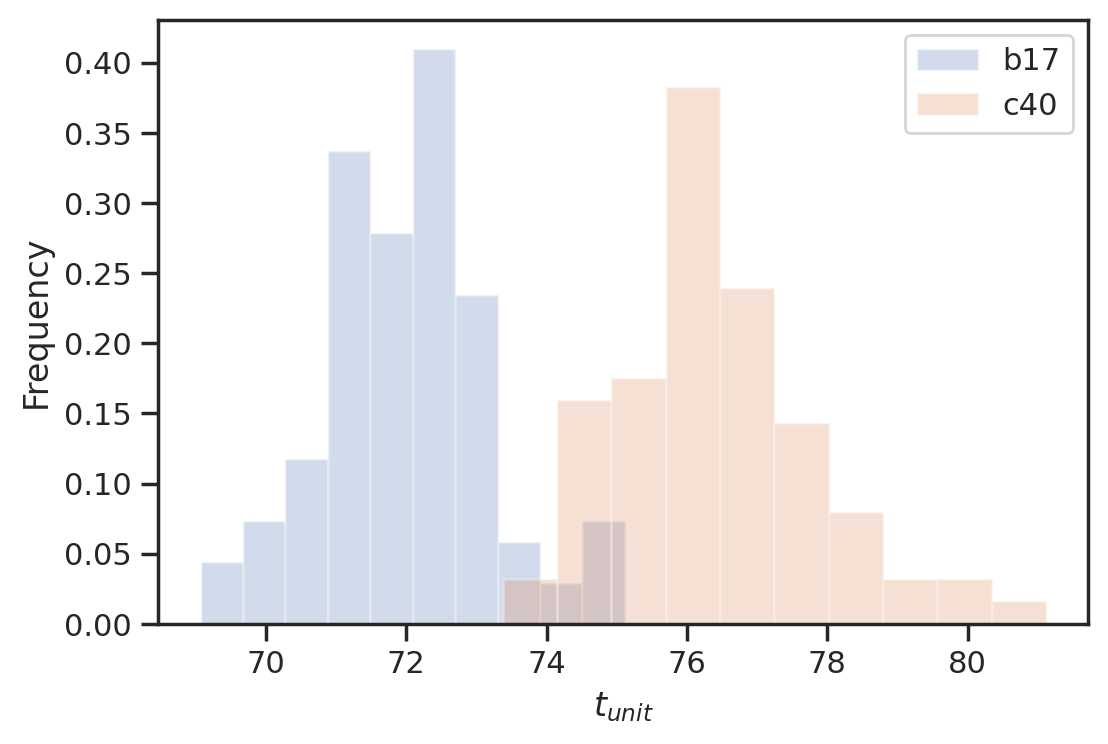

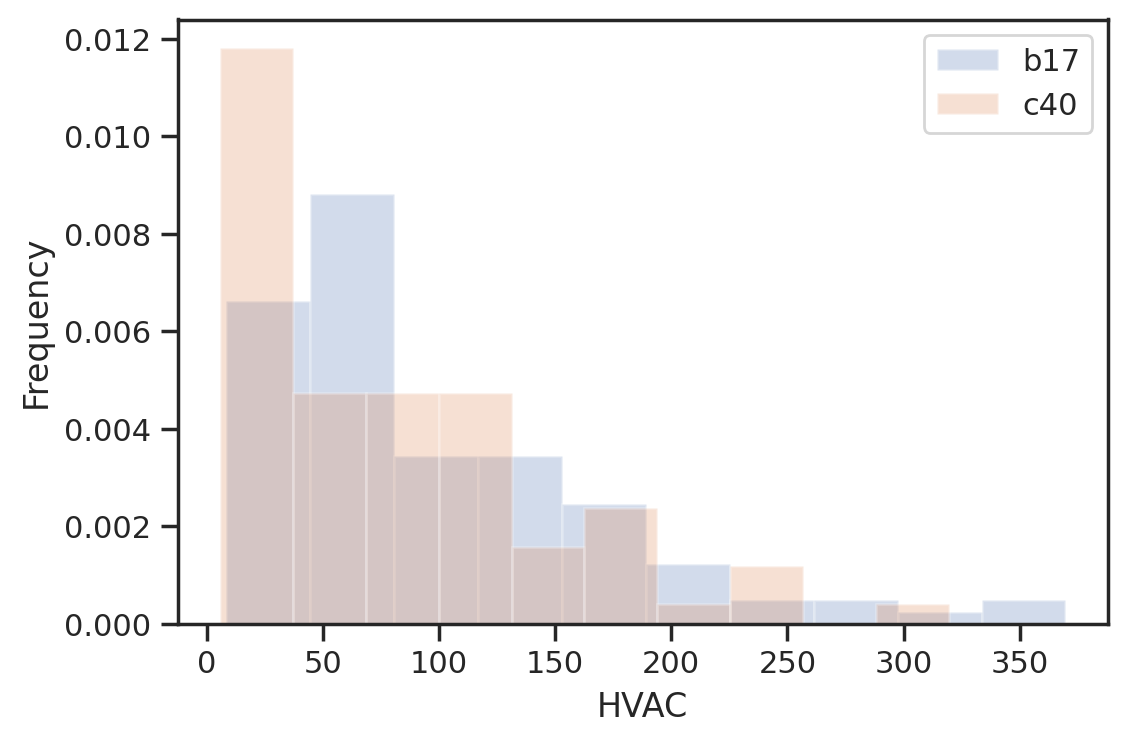

In [154]:
df_b17 = df[(df.household == 'b17')]
df_c40 = df[(df.household == 'c40')]

fig, ax = plt.subplots()
ax.scatter(df_b17['t_out'], df_b17['t_unit'], label = 'b17')
ax.scatter(df_c40['t_out'], df_c40['t_unit'], label = 'c40')
ax.set_xlabel('$t_{out}$')
ax.set_ylabel('$t_{unit}$')
ax.legend(loc = 'best'); 

fig, ax = plt.subplots()
ax.scatter(df_b17['t_out'], df_b17['hvac'], label = 'b17')
ax.scatter(df_c40['t_out'], df_c40['hvac'], label = 'c40')
ax.set_xlabel('$t_{out}$')
ax.set_ylabel('HVAC')
ax.legend(loc = 'best'); 

fig, ax = plt.subplots()
ax.hist(df_b17['t_unit'], density=True, alpha = 0.25, label = 'b17')
ax.hist(df_c40['t_unit'], density=True, alpha = 0.25, label = 'c40')
ax.set_xlabel('$t_{unit}$'); 
ax.set_ylabel('Frequency');
ax.legend(loc = 'best'); 

fig, ax = plt.subplots()
ax.hist(df_b17['hvac'], density=True, alpha = 0.25, label = 'b17')
ax.hist(df_c40['hvac'], density=True, alpha = 0.25, label = 'c40')
ax.set_xlabel('HVAC')
ax.set_ylabel('Frequency')
ax.legend(loc = 'best'); 

*Your answer and explanation here. Use as many code and markdown blocks as you want.*